# Credit Ratings EDA

In [397]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt

In [398]:
# Load combined data into pandas
# C:\Users\ijyli\Box\STAT 222 Capstone\Intermediate Data\combined_credit_rating_data.csv
corporate_rating = pd.read_csv('~\Box\STAT 222 Capstone\Intermediate Data\combined_credit_rating_data.csv')
corporate_rating

<>:3: SyntaxWarning: invalid escape sequence '\B'
<>:3: SyntaxWarning: invalid escape sequence '\B'
C:\Users\ijyli\AppData\Local\Temp\ipykernel_18200\27064269.py:3: SyntaxWarning: invalid escape sequence '\B'
  corporate_rating = pd.read_csv('~\Box\STAT 222 Capstone\Intermediate Data\combined_credit_rating_data.csv')


,Rating,Symbol,Rating Agency Name,Date,Source
0,BBB,BCE,DBRS,2016-08-08,Both
1,BBB,BEP,DBRS,2015-11-09,Supplementary
2,BBB,BEP,DBRS,2015-11-25,Supplementary
3,A,CCJ,DBRS,2016-06-03,Supplementary
4,A,COST,DBRS,2014-05-20,Supplementary
...,...,...,...,...,...
8727,BBB,ZTS,Standard & Poor's Ratings Services,2014-01-31,Both
8728,BBB,ZTS,Standard & Poor's Ratings Services,2015-01-30,Both
8729,BBB,ZTS,Standard & Poor's Ratings Services,2015-11-03,Supplementary
8730,BBB,ZTS,Standard & Poor's Ratings Services,2016-01-22,Both


In [399]:
# Convert Date to datetime in pandas
corporate_rating['Date'] = pd.to_datetime(corporate_rating['Date'])

In [400]:
# All columns
print(corporate_rating.columns)

Index(['Rating', 'Symbol', 'Rating Agency Name', 'Date', 'Source'], dtype='object')


In [401]:
# Summarize variables
corporate_rating.describe()

,Date
count,8732
mean,2014-06-11 15:19:22.620247552
min,2005-08-16 00:00:00
25%,2013-07-08 18:00:00
50%,2014-07-25 00:00:00
75%,2015-07-27 06:00:00
max,2016-12-27 00:00:00


Axes(0.125,0.11;0.775x0.77)
Year
2005       1
2009       1
2010      47
2011     355
2012    1250
2013    1516
2014    2109
2015    2259
2016    1194
Name: count, dtype: int64


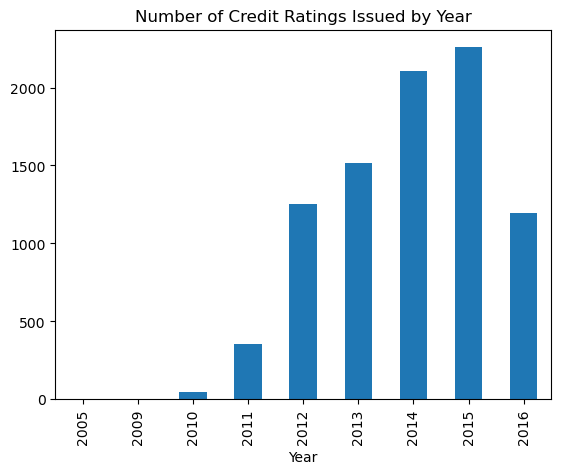

In [402]:
# Create Year variable
corporate_rating['Year'] = corporate_rating['Date'].dt.year

# Bar chart, sorted by Year
print(corporate_rating['Year'].value_counts().sort_index().plot(kind='bar', title='Number of Credit Ratings Issued by Year'))

# Table of values of Year
print(corporate_rating['Year'].value_counts().sort_index())

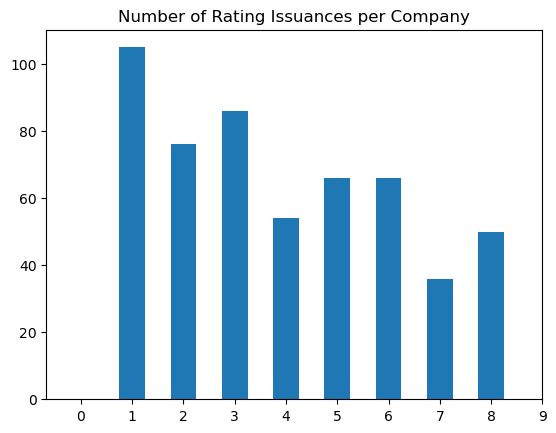

In [403]:
# How many observations/ratings per company? Create histogram with bin width of 1 and axis ticks every 1
# Bars centered over ticks
# Bar width of 0.5
plt.hist(corporate_rating['Symbol'].value_counts(), bins=range(10), align='left', rwidth=0.5)
plt.xticks(range(10))
plt.title('Number of Rating Issuances per Company')
plt.show()

<Axes: title={'center': 'Issuances of Each Rating'}, xlabel='Rating'>

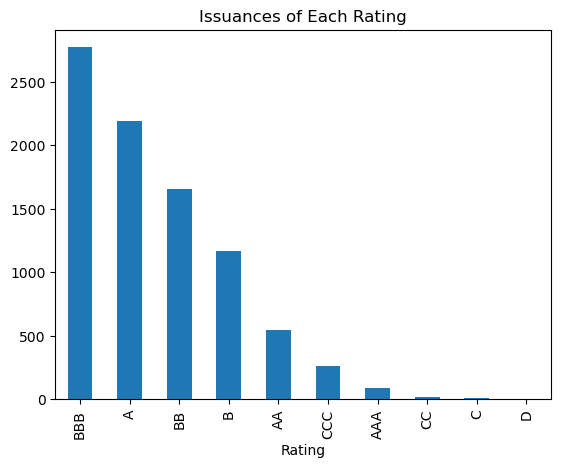

In [404]:
# Bar chart of Rating
corporate_rating['Rating'].value_counts().plot(kind='bar', title='Issuances of Each Rating')

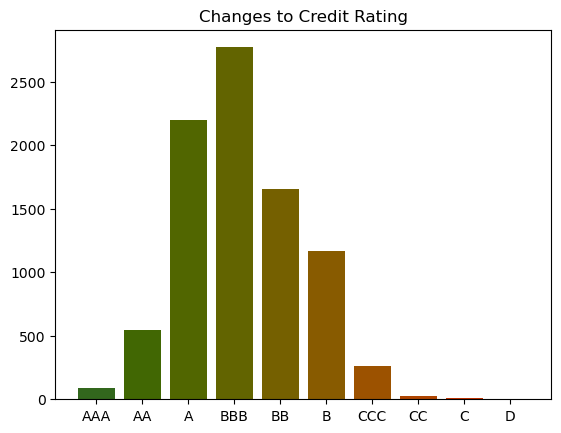

In [405]:
# Colored with gradient and ordered

# Colors AAA through D
# Used https://colordesigner.io/gradient-generator#google_vignette
# Assign hex codes from green to red
#32671d
#416703
#516600
#626400
#756000
#885b00
#9c5200
#af4500
#c33200
#d60000
hex_code_mapper = {'AAA': '#32671d', 'AA': '#416703', 'A': '#516600', 'BBB': '#626400', 'BB': '#756000', 'B': '#885b00', 'CCC': '#9c5200', 'CC': '#af4500', 'C': '#c33200', 'D': '#d60000'}

# Ordering of bars - keys from hex_code_mapper
bar_order = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'CC', 'C', 'D']
# Assign values of Rating to this ordering
corporate_rating['Rating'] = pd.Categorical(corporate_rating['Rating'], categories=bar_order, ordered=True)

# Create plot
# Save to "../Output/Distribution of Ratings.png"
plt.bar(corporate_rating['Rating'].value_counts().sort_index().index, corporate_rating['Rating'].value_counts().sort_index(), color=[hex_code_mapper[i] for i in bar_order])
plt.title('Changes to Credit Rating')
#plt.savefig('../../Output/Distribution of Rating Issuances.png')
plt.show()


C:\Users\ijyli\AppData\Local\Temp\ipykernel_18200\2179924635.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(map(f, plt.gca().get_xticklabels()))


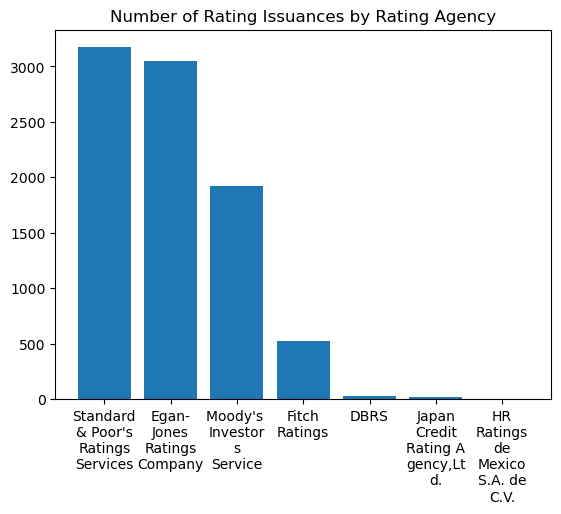

In [406]:
# Plot of Rating Agency Name
plt.bar(corporate_rating['Rating Agency Name'].value_counts().index, corporate_rating['Rating Agency Name'].value_counts())
plt.title('Number of Rating Issuances by Rating Agency')
#plt.savefig('../../Output/Rating Issuances by Rating Agency.png')
import textwrap
f = lambda x: textwrap.fill(x.get_text(), 8)
plt.gca().set_xticklabels(map(f, plt.gca().get_xticklabels()))
plt.show()

In [407]:
# Count of firms
corporate_rating['Symbol'].nunique()

886

# Limited Scope - S&P Ratings 2010-2016

In [408]:
# Regex search for Standard & Poor's
# Limit on years
s_and_p_2010_2016_data = corporate_rating[corporate_rating['Rating Agency Name'].str.contains('Standard & Poor\'s') & (corporate_rating['Year'] >= 2010) & (corporate_rating['Year'] <= 2016)]

s_and_p_2010_2016_data

,Rating,Symbol,Rating Agency Name,Date,Source,Year
5560,AAA,AAPL,Standard & Poor's Ratings Services,2014-04-24,Supplementary,2014
5561,AA,AAPL,Standard & Poor's Ratings Services,2014-05-27,Supplementary,2014
5562,AA,AAPL,Standard & Poor's Ratings Services,2015-02-18,Supplementary,2015
5563,AA,AAPL,Standard & Poor's Ratings Services,2015-05-28,Both,2015
5564,AA,AAPL,Standard & Poor's Ratings Services,2015-06-02,Supplementary,2015
...,...,...,...,...,...,...
8727,BBB,ZTS,Standard & Poor's Ratings Services,2014-01-31,Both,2014
8728,BBB,ZTS,Standard & Poor's Ratings Services,2015-01-30,Both,2015
8729,BBB,ZTS,Standard & Poor's Ratings Services,2015-11-03,Supplementary,2015
8730,BBB,ZTS,Standard & Poor's Ratings Services,2016-01-22,Both,2016


In [409]:
# Count of firms
s_and_p_2010_2016_data['Symbol'].nunique()

638

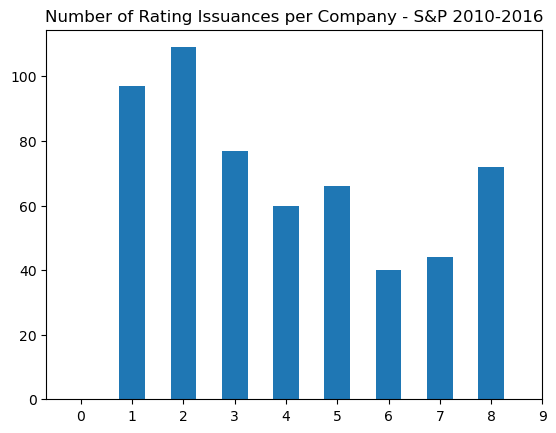

In [410]:
# How many observations/ratings per company? Create histogram with bin width of 1 and axis ticks every 1
# Bars centered over ticks
# Bar width of 0.5
plt.hist(s_and_p_2010_2016_data['Symbol'].value_counts(), bins=range(10), align='left', rwidth=0.5)
plt.xticks(range(10))
plt.title('Number of Rating Issuances per Company - S&P 2010-2016')
plt.savefig('../../Output/Number of Rating Issuances per Company - S&P 2010-2016.png')
plt.show()

In [411]:
# Mark changes in ratings
# Order by Rating Agency Name, Symbol, and Date
# If Rating is not equal to the lag but Rating Agency Name and Symbol are, flag the observation as a change in rating
s_and_p_2010_2016_data = s_and_p_2010_2016_data.sort_values(by=['Rating Agency Name', 'Symbol', 'Date'])
s_and_p_2010_2016_data['Rating Change'] = (s_and_p_2010_2016_data['Rating'] != s_and_p_2010_2016_data['Rating'].shift(1)) & (s_and_p_2010_2016_data['Rating Agency Name'] == s_and_p_2010_2016_data['Rating Agency Name'].shift(1)) & (s_and_p_2010_2016_data['Symbol'] == s_and_p_2010_2016_data['Symbol'].shift(1))
# Mark item as ambiguous if rating agency or symbol changes
s_and_p_2010_2016_data['Ambiguous'] = (s_and_p_2010_2016_data['Rating Agency Name'] != s_and_p_2010_2016_data['Rating Agency Name'].shift(1)) | (s_and_p_2010_2016_data['Symbol'] != s_and_p_2010_2016_data['Symbol'].shift(1))

# Create Type variable
# Ambiguous if Ambiguous is True
# Change if Rating Change is True
# Affirmation if both are False
s_and_p_2010_2016_data['Type'] = 'Affirmation'
s_and_p_2010_2016_data.loc[s_and_p_2010_2016_data['Rating Change'], 'Type'] = 'Change'
s_and_p_2010_2016_data.loc[s_and_p_2010_2016_data['Ambiguous'], 'Type'] = 'Ambiguous'

# Cross tabulate Type and Rating Change and Ambiguous
print(pd.crosstab(s_and_p_2010_2016_data['Type'], s_and_p_2010_2016_data['Rating Change']))
print(pd.crosstab(s_and_p_2010_2016_data['Type'], s_and_p_2010_2016_data['Ambiguous']))

# Drop Rating Change and Ambiguous columns
s_and_p_2010_2016_data = s_and_p_2010_2016_data.drop(columns=['Rating Change', 'Ambiguous'])

# Print 100 rows to check
print(s_and_p_2010_2016_data.head(100))

Rating Change  False  True 
Type                       
Affirmation     1991      0
Ambiguous        638      0
Change             0    542
Ambiguous    False  True 
Type                     
Affirmation   1991      0
Ambiguous        0    638
Change         542      0
     Rating Symbol                  Rating Agency Name       Date  \
5560    AAA   AAPL  Standard & Poor's Ratings Services 2014-04-24   
5561     AA   AAPL  Standard & Poor's Ratings Services 2014-05-27   
5562     AA   AAPL  Standard & Poor's Ratings Services 2015-02-18   
5563     AA   AAPL  Standard & Poor's Ratings Services 2015-05-28   
5564     AA   AAPL  Standard & Poor's Ratings Services 2015-06-02   
...     ...    ...                                 ...        ...   
5655     BB   ALGT  Standard & Poor's Ratings Services 2016-11-30   
5656      B    ALK  Standard & Poor's Ratings Services 2011-07-29   
5657      B    ALK  Standard & Poor's Ratings Services 2012-07-20   
5658     BB   ALKS  Standard & Poor's Ra

In [412]:
# Values of Type
print('Num ratings issued')
print(len(s_and_p_2010_2016_data))
print(s_and_p_2010_2016_data['Type'].value_counts())

Num ratings issued
3171
Type
Affirmation    1991
Ambiguous       638
Change          542
Name: count, dtype: int64
